In [ ]:
!pip install pygad

In [ ]:
import pygad
import pygad.gann
import numpy
import math
import csv
import pandas as pd
import numpy as np
import json
from keras.models import model_from_json
from numpy import array
import pathlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# define the path
directory = pathlib.Path('/content/drive/MyDrive/Interpolation')

# define the pattern
currentCompany = 'QLYS'

for currentFile in directory.glob(currentCompany):
    print(currentFile)


fileNum = 'InterpolatedNumWeek' + str(currentCompany) + '.csv' 
modelNum = 'modelNum' + str(currentCompany) + '.json'
weightsNum = 'modelNum' + str(currentCompany) + '.h5'

fileDen = 'InterpolatedDenWeek' + str(currentCompany) + '.csv'
modelDen = 'modelDen' + str(currentCompany) + '.json'
weightsDen = 'modelDen' + str(currentCompany) + '.h5'

# print(currentFile/)

/content/drive/MyDrive/Interpolation/QLYS


In [ ]:
class models:  

    def __init__(self, pModelNum, pModelDen):
      self.modelNum = pModelNum
      self.modelDen = pModelDen

def create_Models():
    # Numerador
    # load json and create model
    json_file = open(currentFile/modelNum, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model_num = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model_num.load_weights(currentFile/weightsNum)
    # Denominador
    json_file = open(currentFile/modelDen, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model_den = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model_den.load_weights(currentFile/weightsDen)  

    newModel = models(loaded_model_num, loaded_model_den)
    return newModel

In [ ]:
#def read_csv():
#Leyendo archivo
df = pd.read_csv(currentFile/fileDen)
df_N = pd.read_csv(currentFile/fileNum)
global ufcf, dfcf, max_D, max_N, min_D, min_N
global x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12
global detMC1, dfMC1
#Denominador
max_D = {'D Revenue':df['D Revenue'].max(), 'U CR':df['U CR'].max(), 'D OE':df['D OE'].max(), 
    'U NOI':df['U NOI'].max(),'U CAPEX':df['U CAPEX'].max(), 'U WK':df['U WK'].max()} 
min_D = {'D Revenue':df['D Revenue'].min(), 'U CR':df['U CR'].min(), 'D OE':df['D OE'].min(), 
    'U NOI':df['U NOI'].min(),'U CAPEX':df['U CAPEX'].min(), 'U WK':df['U WK'].min()}
#Numerador
max_N = {'U Revenue':df_N['U Revenue'].max(), 'D CR':df_N['D CR'].max(), 'U OE':df_N['U OE'].max(), 
    'D NOI':df_N['D NOI'].max(),'D CAPEX':df_N['D CAPEX'].max(), 'D WK':df_N['D WK'].max()} 
min_N = {'U Revenue':df_N['U Revenue'].min(), 'D CR':df_N['D CR'].min(), 'U OE':df_N['U OE'].min(), 
    'D NOI':df_N['D NOI'].min(),'D CAPEX':df_N['D CAPEX'].min(), 'D WK':df_N['D WK'].min()}

filas_d, columnas_d = df.count()-1, len(df.columns)-1
dataset_D = df.values
#Variables a pasar a la funcion generate_population
dfcf = float(dataset_D[filas_d, columnas_d][1])
filas_n, columnas_n = df_N.count()-1, len(df_N.columns)-1
dataset_N = df_N.values
ufcf = float(dataset_N[filas_d, columnas_d][1])

#boundaries_x = boundaries(max_D, min_D, max_N, min_N)


dfJoin = df_N[['U Revenue','D CR','U OE','D NOI','D CAPEX','D WK']].combine_first(df[['D Revenue','U CR','D OE','U NOI','U CAPEX','U WK']])
dfMC1 = pd.DataFrame(dfJoin,columns=['U Revenue','D CR','U OE','D NOI','D CAPEX','D WK','D Revenue','U CR','D OE','U NOI','U CAPEX','U WK'])

pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.set_option('expand_frame_repr', False)
# print(dfMC1)
pd.reset_option('display.max_rows')

corrMatrix = dfMC1.corr()
# print (corrMatrix)
detMC1 = np.linalg.det(corrMatrix)
# print("\ndetMC1:", detMC1)


##Calculo de las x
#Numerador
x1 = df_N['U Revenue'].corr(df_N['U FCF'])
x2 = df_N['D CR'].corr(df_N['U FCF'])
x3 = df_N['U OE'].corr(df_N['U FCF'])
x4 = df_N['D NOI'].corr(df_N['U FCF'])
x5 = df_N['D CAPEX'].corr(df_N['U FCF'])
x6 = df_N['D WK'].corr(df_N['U FCF'])
#Denominador
x7 = df['D Revenue'].corr(df['D FCF'])
x8 = df['U CR'].corr(df['D FCF'])
x9 = df['D OE'].corr(df['D FCF'])
x10 = df['U NOI'].corr(df['D FCF'])
x11 = df['U CAPEX'].corr(df['D FCF'])
x12 = df['U WK'].corr(df['D FCF'])

In [ ]:
def apply_function(individual):      
    w1 = individual[0]
    w2 = individual[1]
    w3 = individual[2]
    w4 = individual[3]
    w5 = individual[4]
    w6 = individual[5]
    w7 = individual[6]
    w8 = individual[7]
    w9 = individual[8]
    w10 = individual[9]
    w11 = individual[10]
    w12 = individual[11]
    print('\nIndividuo')
    print(individual)
 
    #Numerador
    w1_std = (w1-min_N['U Revenue'])/(max_N['U Revenue']-min_N['U Revenue'])
    w2_std = (w2-min_N['D CR'])/(max_N['D CR']-min_N['D CR'])
    w3_std = (w3-min_N['U OE'])/(max_N['U OE']-min_N['U OE'])
    w4_std = (w4-min_N['D NOI'])/(max_N['D NOI']-min_N['D NOI'])
    w5_std = (w5-min_N['D CAPEX'])/(max_N['D CAPEX']-min_N['D CAPEX'])
    w6_std = (w6-min_N['D WK'])/(max_N['D WK']-min_N['D WK'])
    #Denominador
    w7_std = (w7-min_D['D Revenue'])/(max_D['D Revenue']-min_D['D Revenue'])
    w8_std = (w8-min_D['U CR'])/(max_D['U CR']-min_D['U CR'])
    w9_std = (w9-min_D['D OE'])/(max_D['D OE']-min_D['D OE'])
    w10_std = (w10-min_D['U NOI'])/(max_D['U NOI']-min_D['U NOI'])
    w11_std = (w11-min_D['U CAPEX'])/(max_D['U CAPEX']-min_D['U CAPEX'])
    w12_std = (w12-min_D['U WK'])/(max_D['U WK']-min_D['U WK'])
    w_numerador = [[w1_std, w2_std, w3_std, w4_std, w5_std, w6_std]]
    w_denominador = [[w7_std, w8_std, w9_std, w10_std, w11_std, w12_std]]
    Xnewnum = array(w_numerador)
    Xnewden = array(w_denominador)
    # make a prediction
    numerador = modelObject.modelNum.predict(Xnewnum) 
    denominador = modelObject.modelDen.predict(Xnewden)
    #print('Elementos Numerador')
    #print(Xnewnum)
    #print('Elementos Denominador')
   # print(Xnewden)
    #print('Numerador: ', numerador)
    # print(numerador)
   # print('Denominador: ', denominador)
    # print(denominador)
    # numerador = loaded_model_num.predict(Xnewnum) 
    # denominador = loaded_model_den.predict(Xnewden)
    #function_costo1 = ufcf/dfcf
    function_costo2 = numerador/denominador
    #function_costo2num = function_costo2[0][0]
    #function_result = (function_costo2num - function_costo1)/function_costo1
    #print(function_costo2)
    return function_costo2

In [ ]:
def population_as_vectors():
    columns = list(dfMC1) 
    population_vectors = []

    for i in columns:
        # print(i)
        decile = []
        sorted_df = dfMC1.sort_values(by=i, ascending=True)
        # print(sorted_df[i])
        for j in range(1, 11, 1):
            decile.append(((sorted_df[i].quantile(j/10))))
            # print("Decile{j} {i}: {decile}".format(i=i, j=j, decile=decile))
            # ws.insert(, decile)
        population_vectors.append(decile)
    first_generation = np.transpose(population_vectors)
    # print(population_vectors)
    # print(first_generation)
    return first_generation

Streaming output truncated to the last 5000 lines.
 30257.8519119   1992.19266615  3031.37141681 35569.04968985]
detMC1: 9.031691868136662e-13
detMC2:  1.0736583549966072e-72
det2*lambda:  1.0736583549966072e-15
det1-det2:  9.020955284586695e-13
Diferencia ajustada 9.020955284586695e-05
Restricción:  9.31337522912137
Función resultado:  [[-0.21433493]]
Fitness:  [[-1.9961817]]

Individuo
[  566.06925371  3783.94354477  1674.53603524  7144.43057688
 30257.8519119   5900.29017295   961.62970858  3031.37141681
   338.12117439  3045.76948405  1992.19266615 35569.04968985]
detMC1: 9.031691868136662e-13
detMC2:  1.0892625276861505e-72
det2*lambda:  1.0892625276861505e-15
det1-det2:  9.0207992428598e-13
Diferencia ajustada 9.0207992428598e-05
Restricción:  9.313392526965286
Función resultado:  [[-8119.1396]]
Fitness:  [[-75616.734]]
Fitness    = [[12.862582]]

Individuo
[  566.06925371  3783.94354477  1674.53603524  7144.43057688
 30257.8519119    961.62970858  5900.29017295  1992.19266615
  

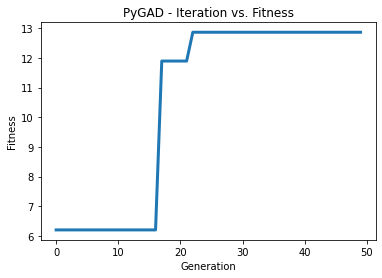


Individuo
[  566.06925371  3783.94354477  1674.53603524  7144.43057688
 30257.8519119    961.62970858  5900.29017295  1992.19266615
  3045.76948405   338.12117439  3031.37141681 35569.04968985]
detMC1: 9.031691868136662e-13
detMC2:  1.14681179701939e-72
det2*lambda:  1.1468117970193901e-15
det1-det2:  9.020223750166468e-13
Diferencia ajustada 9.020223750166469e-05
Restricción:  9.313456325198208
Función resultado:  [[1.381075]]
Fitness:  [[12.862582]]

Individuo
[  566.06925371  3783.94354477  1674.53603524  7144.43057688
 30257.8519119    961.62970858  5900.29017295  1992.19266615
  3045.76948405   338.12117439  3031.37141681 35569.04968985]
detMC1: 9.031691868136662e-13
detMC2:  1.14681179701939e-72
det2*lambda:  1.1468117970193901e-15
det1-det2:  9.020223750166468e-13
Diferencia ajustada 9.020223750166469e-05
Restricción:  9.313456325198208
Función resultado:  [[1.381075]]
Fitness:  [[12.862582]]

Individuo
[  566.06925371  3783.94354477  1674.53603524  7144.43057688
   961.6297085

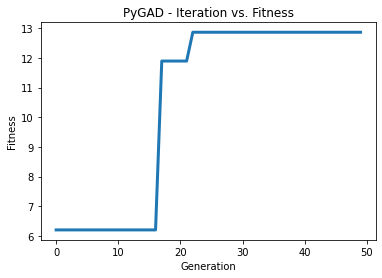

In [ ]:


"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

#function_inputs = [4,-2,3.5,5,-11,-4.7, 5.2] # Function inputs.
function_inputs = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12] # Function inputs.
#desired_output = 44 # Function output.
global modelObject
modelObject = create_Models()

def fitness_func(solution, solution_idx):
    global funcion_resultado
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    #print(solution[0])
    #output = numpy.sum(solution*function_inputs)    
    output = apply_function(solution)
    #Cálculo de la matriz de correlación 2
    w1Nstd = (solution[0] * (max_N['U Revenue']-min_N['U Revenue'])) + min_N['U Revenue']
    w2Nstd = (solution[1] * (max_N['D CR']-min_N['D CR'])) + min_N['D CR']
    w3Nstd = (solution[2] * (max_N['U OE']-min_N['U OE'])) + min_N['U OE']
    w4Nstd = (solution[3] * (max_N['D NOI']-min_N['D NOI'])) + min_N['D NOI']
    w5Nstd = (solution[4] * (max_N['D CAPEX']-min_N['D CAPEX'])) + min_N['D CAPEX']
    w6Nstd = (solution[5] * (max_N['D WK']-min_N['D WK'])) + min_N['D WK']
    w7Nstd = (solution[6] * (max_D['D Revenue']-min_D['D Revenue'])) + min_D['D Revenue']
    w8Nstd = (solution[7] * (max_D['U CR']-min_D['U CR'])) + min_D['U CR']
    w9Nstd = (solution[8] * (max_D['D OE']-min_D['D OE'])) + min_D['D OE']
    w10Nstd = (solution[9] * (max_D['U NOI']-min_D['U NOI'])) + min_D['U NOI']
    w11Nstd = (solution[10] * (max_D['U CAPEX']-min_D['U CAPEX'])) + min_D['U CAPEX']  
    w12Nstd = (solution[11] * (max_D['U WK']-min_D['U WK'])) + min_D['U WK']     
    row_toInsert = {'U Revenue':w1Nstd, 'D CR':w2Nstd, 'U OE':w3Nstd, 'D NOI':w4Nstd, 'D CAPEX':w5Nstd, 'D WK':w6Nstd,
                    'D Revenue':w7Nstd, 'U CR':w8Nstd, 'D OE':w9Nstd, 'U NOI':w10Nstd, 'U CAPEX':w11Nstd, 'U WK':w12Nstd}     
    dfMC2 = dfMC1    
    dfMC2 = dfMC2.append(row_toInsert, ignore_index=True) 
    corrMatrix = dfMC2.corr()
    #print (corrMatrix)
    detMC2 = np.linalg.det(corrMatrix)
    # population_det_I2 = population_as_vectors()[4]
    # row_toInsert2 = {'U Revenue':population_det_I2[0], 'D CR':population_det_I2[1], 'U OE':population_det_I2[2], 'D NOI':population_det_I2[3], 'D CAPEX':population_det_I2[4], 'D WK':population_det_I2[5],
    #                 'D Revenue':population_det_I2[6], 'U CR':population_det_I2[7], 'D OE':population_det_I2[8], 'U NOI':population_det_I2[9], 'U CAPEX':population_det_I2[10], 'U WK':population_det_I2[11]} 
    # MI2 = dfMC1.append(row_toInsert2, ignore_index=True)
    # corrMatrix2 = MI2.corr()
    # detI2 = np.linalg.det(corrMatrix2)
    #print("detMC1:", detMC1)
    # print("detI2: ", detI2)
    #print("detMC2: ", detMC2)
    # var_lambda = detMC1/detI2
    # print("Genración: ", ga_instance.generations_completed)

    restriction = math.log(1/((1E8)*(abs(detMC1 - (detMC2*(1E57))))))
    #Calculo de la funcion de costo1
    function_costo1 = ufcf/dfcf  

    # The value 0.000001 is used to avoid the Inf value when the denominator numpy.abs(output - desired_output) is 0.0.
    #fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    funcion_resultado = (output - function_costo1)/function_costo1    
    fitness = funcion_resultado*restriction
    if ((funcion_resultado < 0) & (restriction < 0)):
        fitness *= -1
    # /(abs(detMC1 - (detMC2*(math.exp(79)))))
    print("detMC1:", detMC1)
    print("detMC2: ", detMC2)
    print("det2*lambda: ", (detMC2*(1E57)))
    print("det1-det2: ", abs(detMC1 - (detMC2*(1E57))))
    print("Diferencia ajustada", ((1E8)*(abs(detMC1 - (detMC2*(1E57))))))
    print("Restricción: ", restriction)
    print("Función resultado: ", funcion_resultado)  
    print("Fitness: ", fitness)
    return fitness

fitness_function = fitness_func

num_generations = 50 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic 
#    algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, 
#    then the sol_per_pop and num_genes parameters are useless.
# sol_per_pop = 10 # Number of solutions in the population.
# num_genes = len(function_inputs)

# init_range_low = 242
# init_range_high = 311256

population_vectors = population_as_vectors()
initial_population = population_vectors.copy()

parent_selection_type = "tournament" # Type of parent selection.
K_tournament = 10
keep_parents = 2 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

crossover_type = "single_point" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "scramble" # Type of the mutation operator.
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists or when mutation_type is None.

# random_mutation_min_val=-25000
# random_mutation_max_val=25000

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("----------------------------------------------------------------------------------")
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       initial_population=initial_population,
                       parent_selection_type=parent_selection_type,
                       K_tournament=K_tournament,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       callback_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("\n",currentCompany)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# prediction = (numpy.array(funcion_resultado))
# print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

best_solution = fitness_func(solution, solution_idx)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_result()